# Selection of ε-values
1. overview of the distribution over each outcome
2. select relevant range for each objective (a range closer to top/bottom if max/min objective) *
3. divide the selected range by 10 to settle on the ε-value for each objective
4. redo this process for the other two models as well

\* Reasoning behind (2):
The used data stems from open exploration (i.e., no bias towards good policies). During optimization, we can expect more policies leading to outcomes in the desired ranges. Picking epsilon ranges that are small enough for these ranges makes it more likely that the resolution is high enough (i.e., that the number of pareto-optimal policies chosen is sufficiently high).

## DEFFUANT

In [2]:
from ema_workbench.analysis import parcoords
import pandas as pd
from ema_workbench import load_results
import seaborn as sns

sns.set(rc={'figure.figsize': (30, 14)})

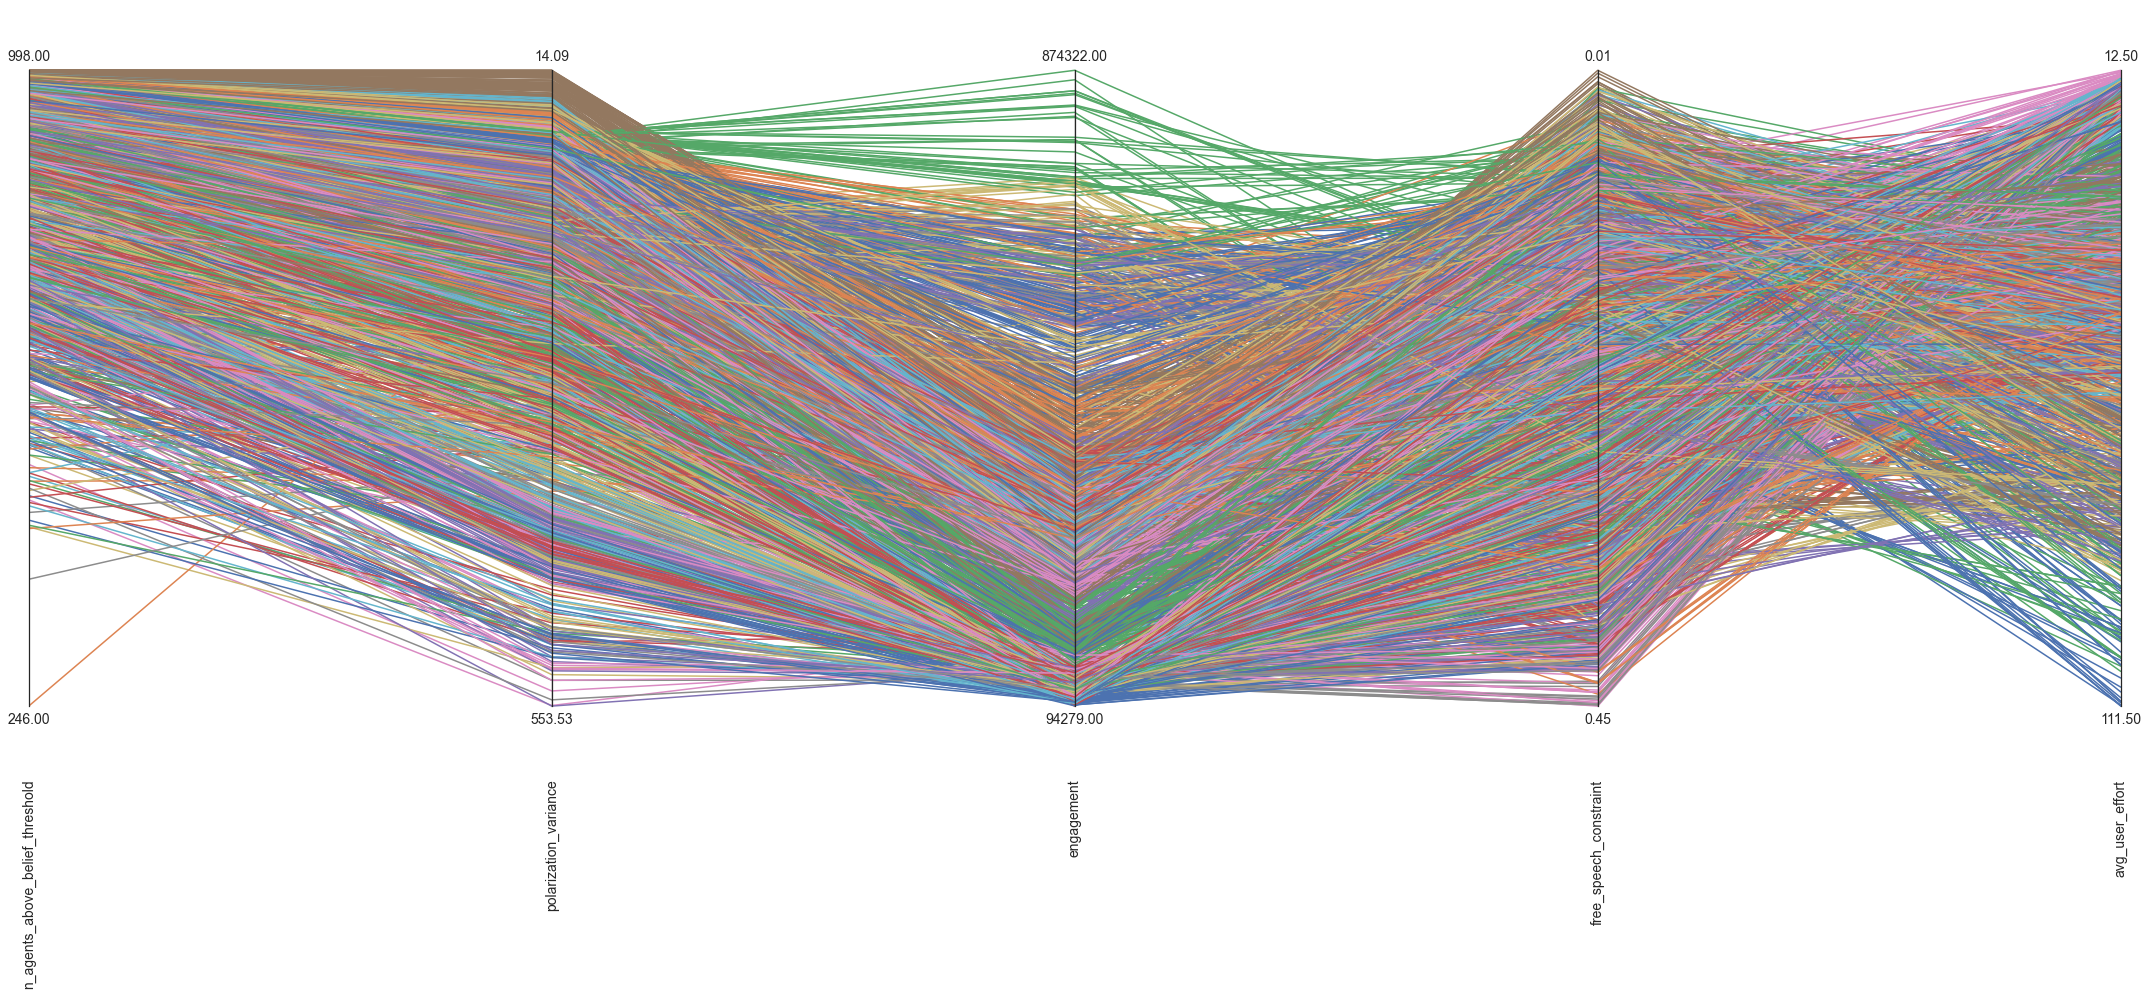

In [4]:
# Get deffuant data
results = load_results('/Users/felicity/PycharmProjects/MisinfoPy/results/open_exploration_50_policies_DEFFUANT')
exp, out = results

# Overview: 1 Parallel axis plot
out = pd.DataFrame(out)
limits = parcoords.get_limits(out)
axes = parcoords.ParallelAxes(limits)

minimize = ['polarization_variance', 'free_speech_constraint', 'avg_user_effort']
for metric in minimize:
    axes.invert_axis(metric)

axes.plot(out)

# Violin-plots for each outcome (subplot 1x5)

# Select a range for each outcome

Colored by model (i.e., belief update function):

In [7]:
# Set limits to be comparable across Belief Update functions
_, deffuant_out = load_results(
    '/Users/felicity/PycharmProjects/MisinfoPy/results/open_exploration_50_policies_DEFFUANT')
_, sample_out = load_results(
    '/Users/felicity/PycharmProjects/MisinfoPy/results/open_exploration_50_policies_SAMPLE')
_, sit_out = load_results('/Users/felicity/PycharmProjects/MisinfoPy/results/open_exploration_50_policies_SIT')

deffuant_out = pd.DataFrame(deffuant_out)
sample_out = pd.DataFrame(sample_out)
sit_out = pd.DataFrame(sit_out)

# Add a column specifying the belief_update_fn that the data stems from
deffuant_out['belief_update_fn'] = 'deffuant'
sample_out['belief_update_fn'] = 'sample'
sit_out['belief_update_fn'] = 'sit'

out = pd.concat([deffuant_out, sample_out, sit_out])
limits = parcoords.get_limits(out)

In [8]:
# Assign each unique policy a color
unique_bufns = out['belief_update_fn'].unique().tolist()
bufn_colors = {}
for _, (bufn, color) in enumerate(zip(unique_bufns, sns.color_palette())):
    bufn_colors[bufn] = color

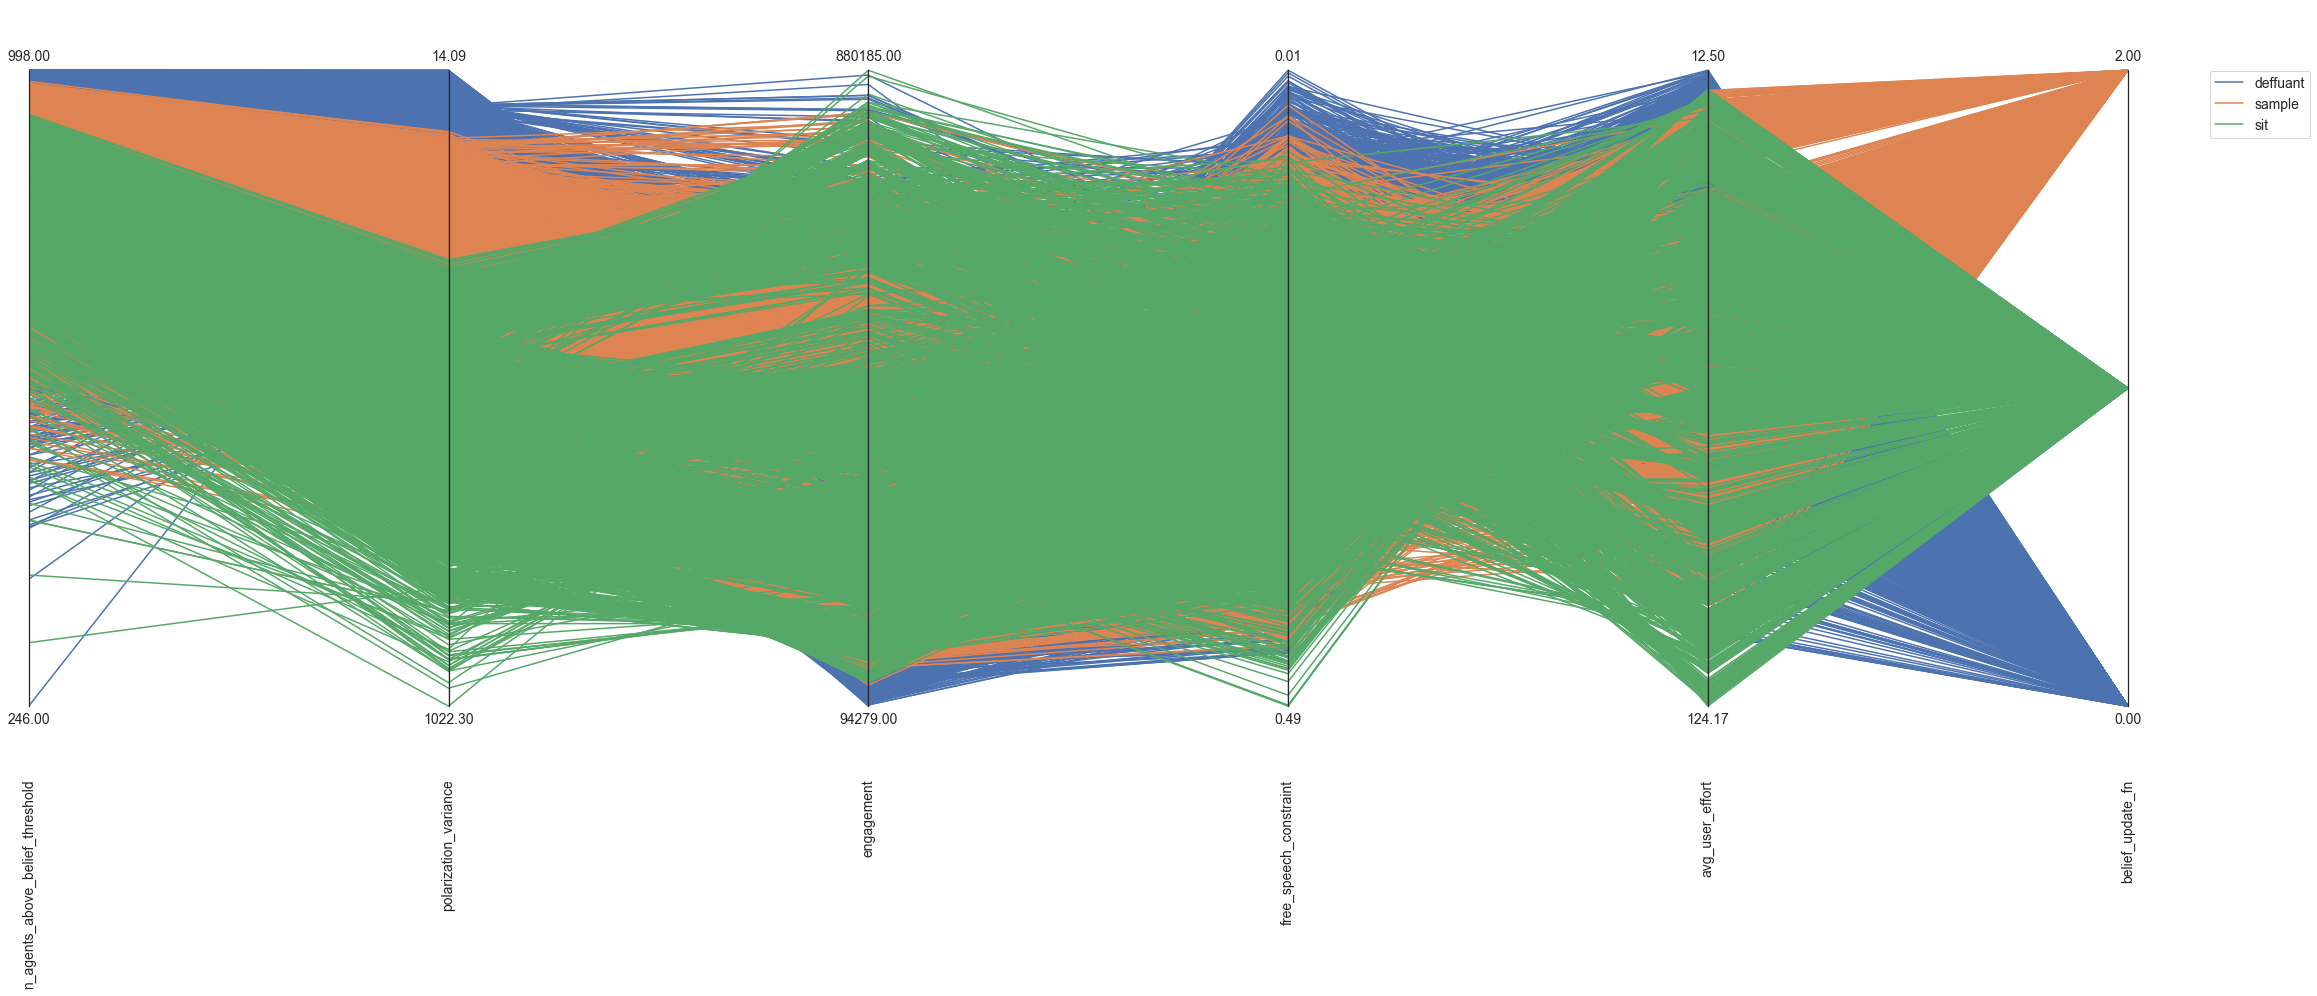

In [14]:
axes = parcoords.ParallelAxes(limits)

minimize = ['polarization_variance', 'free_speech_constraint', 'avg_user_effort']
for metric in minimize:
    axes.invert_axis(metric)

# All off policy, colored by BeliefUpdateFn
for bufn, color in bufn_colors.items():
    part = out[out["belief_update_fn"] == bufn]
    axes.plot(part, color=color, label=bufn)

axes.legend()



['n_agents_above_belief_threshold', 'polarization_variance', 'engagement', 'free_speech_constraint', 'avg_user_effort']
n_agents_above_belief_threshold
polarization_variance
engagement
free_speech_constraint
avg_user_effort


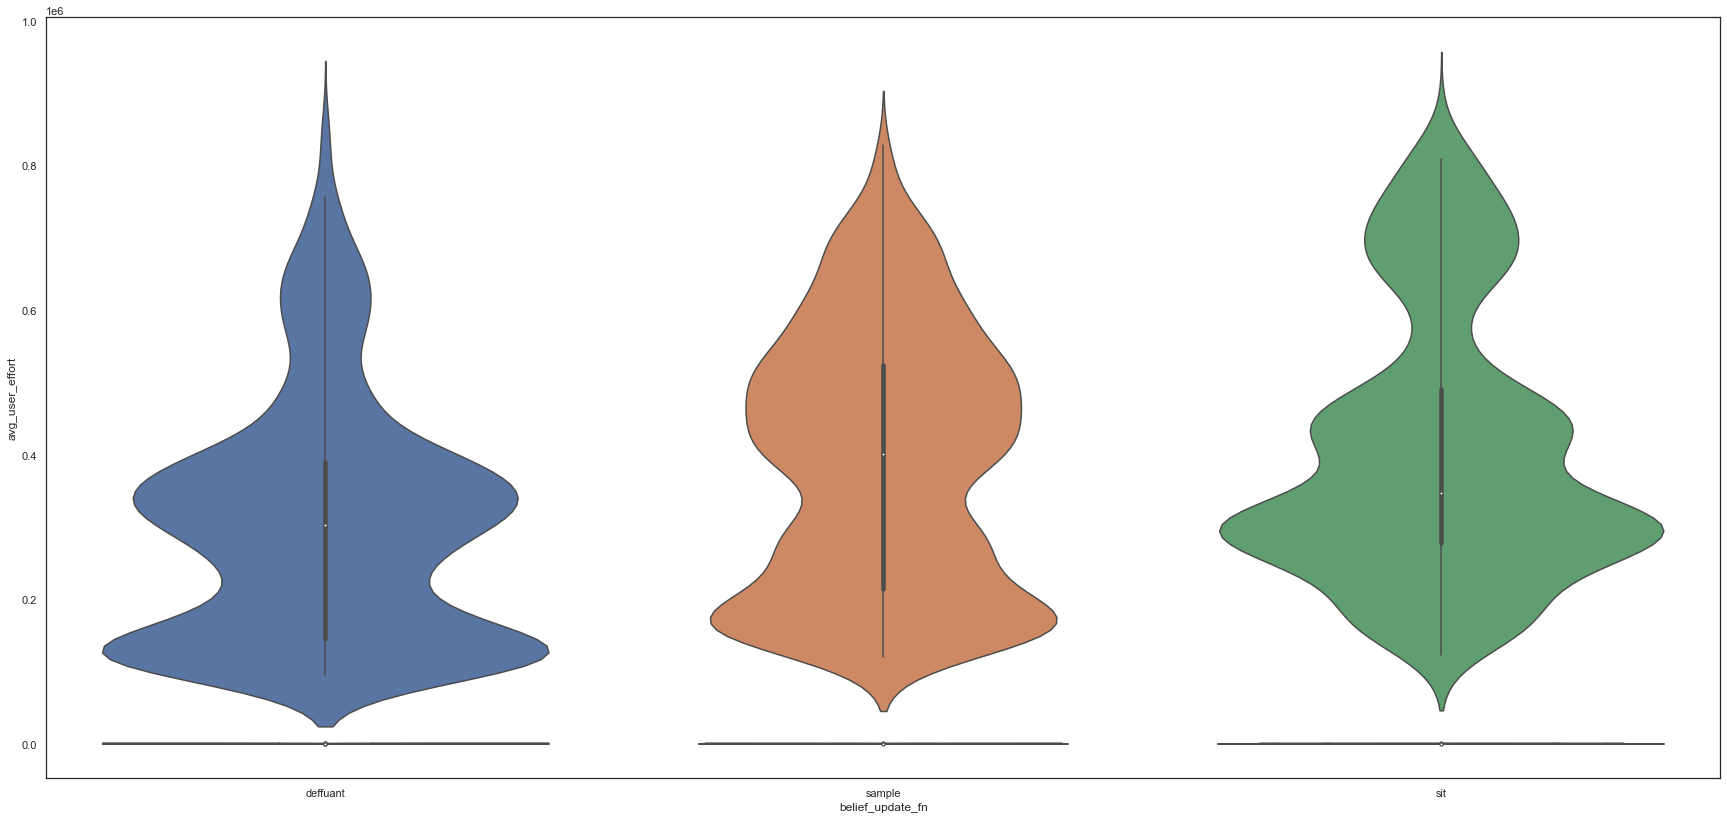

In [33]:
metrics = [m for m in out.columns if m != 'belief_update_fn']

for metric in metrics:
    ax = sns.violinplot(x='belief_update_fn', y=metric, data=out)
